In [1]:
# # please simulate the full dataset from 50 subsets
# # then combine subset together, here we construct the full dataset from 50 subsets

# !cat YOUR_PATH/train_data_seed*.txt > YOUR_PATH/train_combined.txt
# !cat YOUR_PATH/test_data_seed*.txt > YOUR_PATH/test_combined.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# subset verification
# N=900000
# N_TEST=100000
# BlockCount=[10000]
# BlockCount_TEST=[20000]
# NN_est=[100, 200, 300, 400]
# seed=1
# append_str='_RealDataset'
# DIR = '../log/RealDataset_mini'
# fig_tag="mini"
# NN_pred=[200, 400, 600]

N=45000000
N_TEST=5000000
BlockCount=[450000]
BlockCount_TEST=[50000]
NN_est=[100, 200, 400]
seed=42
append_str='_RealDataset_prediction'
DIR = '../../log/RealDataset'
fig_tag="full"
NN_pred=[100, 200, 400, 600]

DIM=10

rmspe_array = []
params_array = []
# Read the CSV file
for i in range(len(BlockCount)):
    for j in range(len(NN_est)):
        df_array = pd.read_csv(f'{DIR}/logFile_numPointsTotal{N}_numBlocksTotal{BlockCount[i]}_m{NN_est[j]}_seed{seed}_isScaled1{append_str}.csv')
        theta_array = pd.read_csv(f'{DIR}/theta_numPointsTotal{N}_numBlocksTotal{BlockCount[i]}_m{NN_est[j]}_seed{seed}_isScaled1_RealDataset.csv', header=None)
        rmspe_array.append(df_array['rmspe'].values)
        params_array.append(theta_array.iloc[0, 2:12].values)

print(rmspe_array)
print(params_array)

[array([5.75196323, 4.58662042, 3.7638064 , 3.4057386 ]), array([3.0130367 , 2.68777877, 2.46343535, 2.37699182]), array([3.04807614, 2.4679969 , 1.95820924, 1.78580196])]
[array([1.10932  , 0.0913635, 0.862249 , 0.395105 , 2.       , 0.776347 ,
       0.191548 , 2.       , 2.       , 0.380749 ]), array([ 0.444267,  0.119638,  0.902796,  0.407982,  1.92268 ,  0.705877,
        0.14463 , 20.      , 20.      ,  0.405781]), array([2.59144e-01, 1.30530e-01, 1.09997e+00, 3.33114e-01, 2.05084e+00,
       8.68624e-01, 5.78451e-02, 5.88218e+01, 2.00000e+02, 5.18610e-01])]


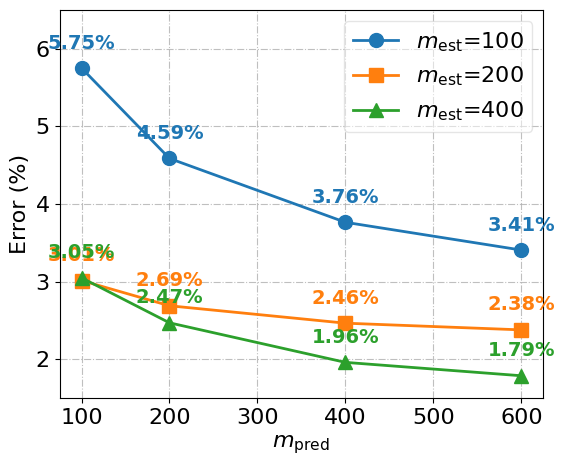

In [14]:
import matplotlib.pyplot as plt 
import numpy as np
import os 

# Set default font size
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Different styles for each line
styles = {
    'colors': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # More distinct colors
    'markers': ['o', 's', '^', 'D'],  # Circle, Square, Triangle, Diamond
    'linestyles': ['-', '--', '-.', ':']  # Solid, Dashed, Dashdot, Dotted
}

for i, nn_est in enumerate(NN_est):
    # Plot lines and markers as before
    plt.plot(NN_pred, rmspe_array[i], 
             marker=styles['markers'][i],
            #  linestyle=styles['linestyles'][i],
             color=styles['colors'][i],
             label=r'$m_{\text{est}}$='+str(nn_est),
             markersize=10,
             linewidth=2)
    
    # Add text labels to each point
    for x, y in zip(NN_pred, rmspe_array[i]):
        plt.text(x, y + 0.2, f'{y:.2f}%', 
                 ha='center', va='bottom', 
                 color=styles['colors'][i],
                 fontweight='bold',
                 fontsize=14)
plt.xlabel(r'$m_{\text{pred}}$', fontsize=16)
plt.ylabel('Error (%)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.title('RMSPE vs NN_pred for different NN_est values')
plt.legend(framealpha=0.5, fontsize=16)
plt.ylim(1.5, 6.5)
plt.grid(True, ls="-.", alpha=0.8)
plt.tight_layout()
os.makedirs('./fig', exist_ok=True)
plt.savefig(f'./fig/real_dataset_{fig_tag}_rmspe.pdf')
plt.show()

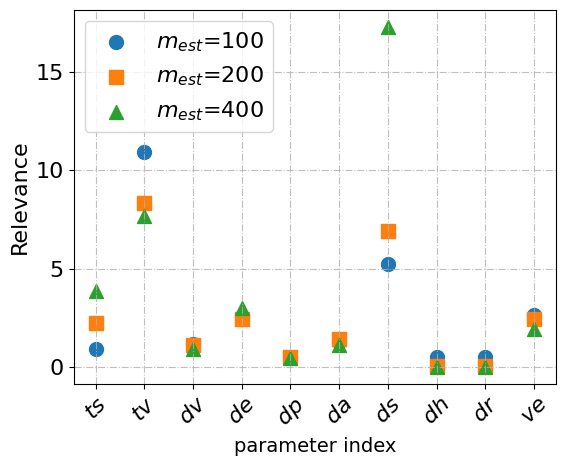

In [15]:
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Different styles for each line
styles = {
    'colors': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # More distinct colors
    'markers': ['o', 's', '^', 'D'],  # Circle, Square, Triangle, Diamond
}

# Parameter names
param_names = [r'$ts$', r'$tv$', r'$dv$', r'$de$', r'$dp$', r'$da$', r'$ds$', r'$dh$', r'$dr$', r'$ve$']
x_values = range(1, 11)

# Plot each theta array
for i, nn_est in enumerate(NN_est):
    plt.scatter(x_values, 1/params_array[i], 
               marker=styles['markers'][i],
               color=styles['colors'][i],
               label=r'$m_{est}$='+str(nn_est),
               s=100)

# plt.xticks(x_values, param_names, rotation=45)  # Add parameter names to x-axis
plt.xlabel('parameter index', fontsize=14)
plt.ylabel('Relevance', fontsize=16)
plt.xticks(x_values, param_names, rotation=45, fontsize=16)  # Smaller font for x-axis labels
plt.yticks(fontsize=16)  # Smaller font for y-axis labels

# plt.legend(framealpha=0.5)
plt.legend(fontsize=16)
plt.grid(True, ls="-.", alpha=0.8)
plt.tight_layout()
# plt.yscale('log')
plt.savefig(f'./fig/real_dataset_{fig_tag}_params.pdf')
plt.show()